In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib as u
from bs4 import BeautifulSoup as bs
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from adjustText import adjust_text
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df = pd.read_html(sp500_url, header=0)[0]
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [3]:
symbols = df['Symbol'].tolist()

In [4]:
def get_MktCap( symbol ):
    try:
        url = r'http://finviz.com/quote.ashx?t={}'.format(symbol.lower())
        html = u.request.urlopen(url).read()
        soup = bs(html, 'lxml')
        mc =  soup.find(text = r'Market Cap')
        mc_ = mc.find_next(class_='snapshot-td2').text
        print( '{} Market Cap = {}'.format(symbol, mc_) )
        return mc_
    except Exception as e:
        print(e)
        
MrktCap = pd.Series(index=symbols)
for sym in symbols:
    MrktCap[sym] = get_MktCap(sym)

MMM Market Cap = 112.73B
ABT Market Cap = 121.33B
ABBV Market Cap = 132.67B
ABMD Market Cap = 15.10B
ACN Market Cap = 97.85B
ATVI Market Cap = 39.18B
ADBE Market Cap = 116.06B
AMD Market Cap = 19.73B
AAP Market Cap = 12.03B
AES Market Cap = 10.16B
AMG Market Cap = 5.48B
AFL Market Cap = 34.84B
A Market Cap = 22.38B
APD Market Cap = 34.51B
AKAM Market Cap = 10.28B
ALK Market Cap = 7.90B
ALB Market Cap = 8.21B
ARE Market Cap = 12.86B
ALXN Market Cap = 24.75B
ALGN Market Cap = 16.21B
ALLE Market Cap = 7.81B
AGN Market Cap = 50.60B
ADS Market Cap = 9.11B
LNT Market Cap = 10.03B
ALL Market Cap = 28.77B
GOOGL Market Cap = 747.32B
GOOG Market Cap = 719.86B
MO Market Cap = 91.81B
AMZN Market Cap = 809.85B
AEE Market Cap = 16.08B
AAL Market Cap = 14.76B
AEP Market Cap = 36.84B
AXP Market Cap = 84.56B
AIG Market Cap = 37.30B
AMT Market Cap = 71.30B
AWK Market Cap = 16.39B
AMP Market Cap = 15.81B
ABC Market Cap = 16.11B
AME Market Cap = 16.39B
AMGN Market Cap = 129.15B
APH Market Cap = 24.65B
APC

NFLX Market Cap = 147.12B
NWL Market Cap = 9.59B
NFX Market Cap = 3.51B
NEM Market Cap = 18.55B
NWSA Market Cap = 7.16B
NWS Market Cap = -
NEE Market Cap = 83.83B
NLSN Market Cap = 9.09B
NKE Market Cap = 120.27B
NI Market Cap = 9.92B
NBL Market Cap = 10.73B
JWN Market Cap = 7.91B
NSC Market Cap = 45.07B
NTRS Market Cap = 19.05B
NOC Market Cap = 44.73B
NCLH Market Cap = 10.23B
NRG Market Cap = 11.72B
NUE Market Cap = 17.73B
NVDA Market Cap = 88.59B
ORLY Market Cap = 27.51B
OXY Market Cap = 49.97B
OMC Market Cap = 17.02B
OKE Market Cap = 24.70B
ORCL Market Cap = 171.62B
PCAR Market Cap = 20.67B
PKG Market Cap = 8.59B
PH Market Cap = 20.91B
PAYX Market Cap = 24.21B
PYPL Market Cap = 106.88B
PNR Market Cap = 7.03B
PBCT Market Cap = 5.71B
PEP Market Cap = 152.66B
PKI Market Cap = 9.25B
PRGO Market Cap = 6.23B
PFE Market Cap = 251.92B
PCG Market Cap = 9.21B
PM Market Cap = 108.07B
PSX Market Cap = 42.86B
PNW Market Cap = 9.65B
PXD Market Cap = 24.76B
PNC Market Cap = 55.82B
RL Market Cap = 8

In [5]:
MrktCap_df = MrktCap.to_frame().reset_index()
MrktCap_df.columns = [['Ticker symbol','MarketCup']]
MrktCap_df[MrktCap_df.isnull().any(axis=1)]
MrktCap_df.dropna(inplace=True)
MrktCap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 504
Data columns (total 2 columns):
(Ticker symbol,)    504 non-null object
(MarketCup,)        504 non-null object
dtypes: object(2)
memory usage: 11.8+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
Symbol                    505 non-null object
Security                  505 non-null object
SEC filings               505 non-null object
GICS Sector               505 non-null object
GICS Sub Industry         505 non-null object
Headquarters Location     505 non-null object
Date first added[3][4]    400 non-null object
CIK                       505 non-null int64
Founded                   174 non-null object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [7]:
df.columns

Index(['Symbol', 'Security', 'SEC filings', 'GICS Sector', 'GICS Sub Industry',
       'Headquarters Location', 'Date first added[3][4]', 'CIK', 'Founded'],
      dtype='object')

In [8]:
MrktCap_df.columns

MultiIndex(levels=[['MarketCup', 'Ticker symbol']],
           labels=[[1, 0]])

In [9]:
MrktCap =  MrktCap.str[:-1]
MrktCap.dropna(inplace=True)
MrktCap = pd.to_numeric(MrktCap)
MrktCap.sort_values(ascending=False).to_csv('sp500_MarketCup.txt')
MrktCap.sort_values(ascending=False).head()

AMZN     809.85
MSFT     795.26
GOOGL    747.32
AAPL     729.84
GOOG     719.86
dtype: float64

In [10]:
MrktCap_df = pd.DataFrame(MrktCap).reset_index()
MrktCap_df.columns = ['Symbol', 'MarketCup']
MrktCap_df.head()

,Symbol,MarketCup
0,MMM,112.73
1,ABT,121.33
2,ABBV,132.67
3,ABMD,15.10
4,ACN,97.85


In [11]:
df1 = MrktCap_df.drop(MrktCap_df[MrktCap_df.Symbol=='GOOGL'].index)
bigCap = df1.sort_values(by='MarketCup',ascending=False).head(50)
bigCap.head()

,Symbol,MarketCup
28,AMZN,809.85
321,MSFT,795.26
49,AAPL,729.84
26,GOOG,719.86
70,BRK-B,484.24


In [12]:
bigCap_symbols = bigCap.Symbol.tolist() 
bigCap_symbols

['AMZN',
 'MSFT',
 'AAPL',
 'GOOG',
 'BRK-B',
 'FB',
 'JNJ',
 'JPM',
 'V',
 'XOM',
 'WMT',
 'BAC',
 'PFE',
 'VZ',
 'UNH',
 'PG',
 'WFC',
 'T',
 'INTC',
 'CVX',
 'HD',
 'MA',
 'KO',
 'BA',
 'MRK',
 'CSCO',
 'ORCL',
 'DIS',
 'CMCSA',
 'PEP',
 'NFLX',
 'MCD',
 'C',
 'ABBV',
 'AMGN',
 'DWDP',
 'LLY',
 'ABT',
 'NKE',
 'ADBE',
 'UNP',
 'MDT',
 'MMM',
 'CRM',
 'IBM',
 'PM',
 'PYPL',
 'HON',
 'AVGO',
 'ACN']

In [13]:
def get_Edate( symbol ):
    try:
        url = r'http://finviz.com/quote.ashx?t={}'.format(symbol.lower())
        html = u.request.urlopen(url).read()
        soup = bs(html, 'lxml')
        mc =  soup.find(text = r'Earnings')
        mc_ = mc.find_next(class_='snapshot-td2').text
        return mc_
    except Exception as e:
        pass

In [14]:
bigCap['E_date'] = bigCap.Symbol.apply(get_Edate)
bigCap['E_date'].head()

28     Jan 31 AMC
321    Jan 30 AMC
49     Jan 29 AMC
26     Feb 04 AMC
70     Feb 04 AMC
Name: E_date, dtype: object

In [15]:
bigCap[['date','time']] = bigCap['E_date'].str.rsplit(" ",n=1, expand=True)
bigCap.head()

,Symbol,MarketCup,E_date,date,time
28,AMZN,809.85,Jan 31 AMC,Jan 31,AMC
321,MSFT,795.26,Jan 30 AMC,Jan 30,AMC
49,AAPL,729.84,Jan 29 AMC,Jan 29,AMC
26,GOOG,719.86,Feb 04 AMC,Feb 04,AMC
70,BRK-B,484.24,Feb 04 AMC,Feb 04,AMC


In [16]:
bigCap.drop('E_date', axis=1, inplace=True)
bigCap.head()

,Symbol,MarketCup,date,time
28,AMZN,809.85,Jan 31,AMC
321,MSFT,795.26,Jan 30,AMC
49,AAPL,729.84,Jan 29,AMC
26,GOOG,719.86,Feb 04,AMC
70,BRK-B,484.24,Feb 04,AMC


In [17]:
bigCap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 28 to 4
Data columns (total 4 columns):
Symbol       50 non-null object
MarketCup    50 non-null float64
date         50 non-null object
time         50 non-null object
dtypes: float64(1), object(3)
memory usage: 2.0+ KB


In [18]:
bigCap.date = bigCap['date'] + str(',2019')

In [19]:
bigCap.date = pd.to_datetime(bigCap['date'],format="%b %d,%Y")
bigCap.head()

,Symbol,MarketCup,date,time
28,AMZN,809.85,2019-01-31,AMC
321,MSFT,795.26,2019-01-30,AMC
49,AAPL,729.84,2019-01-29,AMC
26,GOOG,719.86,2019-02-04,AMC
70,BRK-B,484.24,2019-02-04,AMC


In [20]:
bigCap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 28 to 4
Data columns (total 4 columns):
Symbol       50 non-null object
MarketCup    50 non-null float64
date         50 non-null datetime64[ns]
time         50 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.0+ KB


In [21]:
bigCap.index = bigCap.date
bigCap.sort_index(inplace=True)
bigCap.tail()

,Symbol,MarketCup,date,time
date,,,,
2019-12-06,AVGO,101.62,2019-12-06,AMC
2019-12-13,ADBE,116.06,2019-12-13,AMC
2019-12-17,ORCL,171.62,2019-12-17,AMC
2019-12-20,NKE,120.27,2019-12-20,AMC
2019-12-20,ACN,97.85,2019-12-20,BMO


In [22]:
mor = bigCap

In [23]:
mor['colors'] = np.where(mor.time =='BMO','blue','green') 

In [24]:
mor = mor[f'{pd.datetime.now().year}-{pd.datetime.now().month}']
if len(mor) > 10:
     mor = mor.sort_values(by='MarketCup', ascending=False)

In [25]:
mor = mor[:9]
mor.sort_index(inplace=True)
mor

,Symbol,MarketCup,date,time,colors
date,,,,,
2019-01-15,JPM,333.84,2019-01-15,BMO,blue
2019-01-16,BAC,261.12,2019-01-16,BMO,blue
2019-01-22,JNJ,347.88,2019-01-22,BMO,blue
2019-01-29,AAPL,729.84,2019-01-29,AMC,green
2019-01-29,PFE,251.92,2019-01-29,BMO,blue
2019-01-30,MSFT,795.26,2019-01-30,AMC,green
2019-01-30,FB,414.40,2019-01-30,AMC,green
2019-01-30,V,305.66,2019-01-30,AMC,green
2019-01-31,AMZN,809.85,2019-01-31,AMC,green


In [26]:
colordict = dict(zip(mor.MarketCup,mor.colors))  
colordict

{251.92: 'blue',
 261.12: 'blue',
 305.66: 'green',
 333.84: 'blue',
 347.88: 'blue',
 414.4: 'green',
 729.84: 'green',
 795.26: 'green',
 809.85: 'green'}

In [27]:
colorList=mor.colors.tolist()
mor

,Symbol,MarketCup,date,time,colors
date,,,,,
2019-01-15,JPM,333.84,2019-01-15,BMO,blue
2019-01-16,BAC,261.12,2019-01-16,BMO,blue
2019-01-22,JNJ,347.88,2019-01-22,BMO,blue
2019-01-29,AAPL,729.84,2019-01-29,AMC,green
2019-01-29,PFE,251.92,2019-01-29,BMO,blue
2019-01-30,MSFT,795.26,2019-01-30,AMC,green
2019-01-30,FB,414.40,2019-01-30,AMC,green
2019-01-30,V,305.66,2019-01-30,AMC,green
2019-01-31,AMZN,809.85,2019-01-31,AMC,green


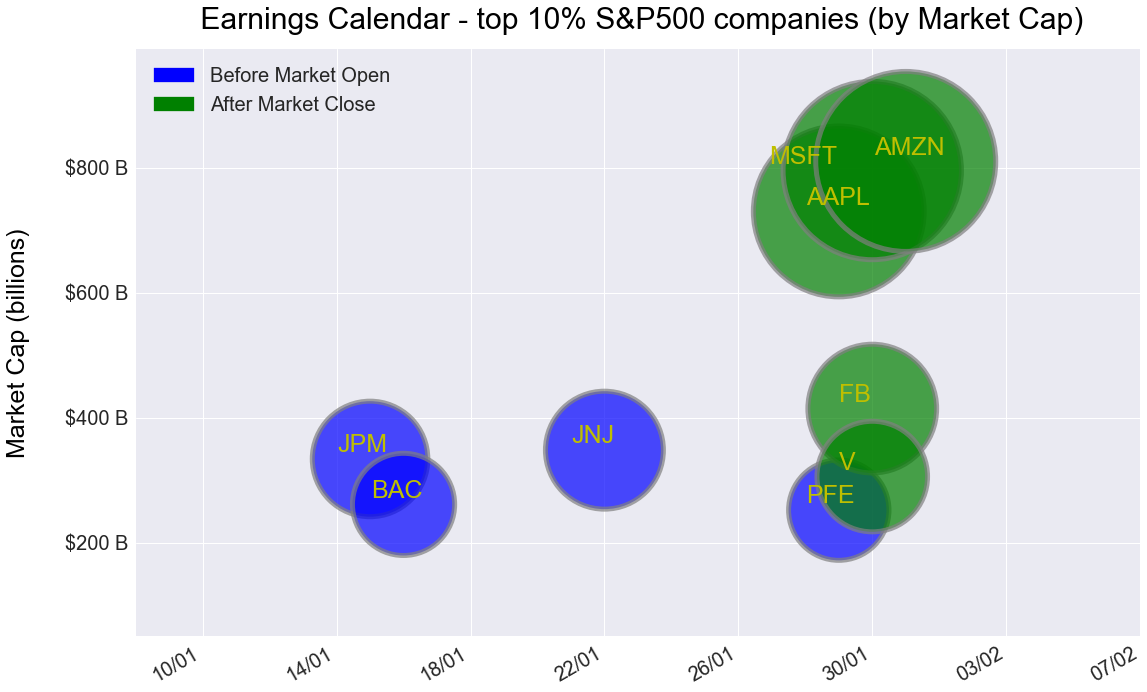

In [28]:
plt.style.use('seaborn');
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1) 
plt.scatter(mor.index, mor.MarketCup, s=mor.MarketCup*40,c=colorList, alpha=0.7, lw=5,edgecolor='grey');
plt.xlim([mor.index.min() - pd.Timedelta('7 days'),mor.index.max() + pd.Timedelta('7 days')]);
    
text = [plt.annotate(txt, (mor.index[i]-pd.Timedelta(days=1), mor.MarketCup[i]), fontsize=25, color='y')\
        for i, txt in enumerate(mor.Symbol)]    
   
plt.ylim(50,990);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Market Cap (billions)', fontsize=25,color='k',labelpad=35)
plt.title(' Earnings Calendar - top 10% S&P500 companies (by Market Cap)', fontsize=30,color='k',pad=20)
fig.autofmt_xdate();
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
ax.yaxis.set_major_formatter(FormatStrFormatter('$%1.f B'))
blue_patch = mpatches.Patch(color='blue', label='Before Market Open')
green_patch = mpatches.Patch(color='green', label='After Market Close')
plt.legend(handles=[blue_patch,green_patch], fontsize=20, loc=2)
adjust_text(text);